# Выполнение работы

### Импортируем класс модели

Класс модели описан в приложении №1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t, chi2
import statsmodels.api as sm
from sympy import symbols, Matrix, sqrt
from model import Model

### Определения

При выполнении курсовой работы используется понятие `p-value`:

`p-value` — вероятность получить для данной модели распределения значений случайной величины такое же или более экстремальное значение статистики, по сравнению с ранее наблюдаемым, при условии, что нулевая гипотеза верна.

### Случай 1
$m=3, \varepsilon_k \sim N(0, \sigma^2)$


Инициализируем модель с заданными параметрами для первого случая

In [2]:
model_1 = Model(m=3, theta=[12.5, -1.0, -2.0, 0.16], sigma=1.6, normal_eps=True)

In [3]:
print("Вектор ошибок:\n")
print(model_1.eps)

Вектор ошибок:

[ 0.55269194  1.11873939 -0.59341989  0.05396172  0.07991609 -0.54703861
 -0.78076125  2.30413716 -0.42471399 -2.91245739  1.31340426 -2.04715994
 -0.77327656  2.1862464  -0.97246783  0.31204696  0.54877187  1.85215906
  0.95688657 -0.10385325  1.62111542  0.09520872  0.97819124 -0.63494703
 -1.73841928 -1.69063207 -0.38013809  0.7746026  -0.3511486   1.08807013
 -0.7999764  -0.58594985 -2.60135166 -1.06792011  1.31047878  2.91486564
 -0.19640127 -1.00732849  0.90965822  0.94305845]


In [4]:
print("список X, на которых строятся наблюдения:\n")
print(model_1.x_k)

список X, на которых строятся наблюдения:

[-3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4 -2.2 -2.  -1.8 -1.6 -1.4 -1.2
 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6
  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  4. ]


In [5]:
print("Полученные наблюдения:\n")
print(model_1.y_obs)

Полученные наблюдения:

[-20.80682806 -16.16622061 -14.10205989  -9.96891828  -6.74008391
  -4.43935861  -2.01292125   3.47229716   2.89160601   2.30754261
   8.20028426   6.27748006   8.76768344  12.7297664   10.36753217
  12.25012696  12.89421187  14.42191906  13.57560657  12.39614675
  13.84239542  11.88544872  12.19275124   9.86697297   7.92158072
   7.00584793   7.23890191   7.2099626    4.8019714    4.86807013
   1.5237036    0.20589015  -3.40919166  -3.53560011  -2.86952122
  -3.02225436  -7.92776127 -10.56236849 -10.49082178 -12.31694155]


#### Пункт 1. Вычисление порядка многочлена для модели, нахождение оценки параметров

Проверка значимости коэффициентов регрессии означает проверку основной гипотезы об их значимом отличии от нуля.

Основная гипотеза состоит в предположении о незначимости коэффициента модели регрессии, т. е.
$$H_0 : \hat{\theta}_{\hat{m}} = 0$$

Обратная или конкурирующая гипотеза состоит в предположении о значимости коэффициентов модели регрессии, т. е.
$$H_1 : \hat{\theta}_{\hat{m}} \neq 0$$

Для проверки гипотезы  на уровне значимости $\alpha$  используем статистический критерий $T_i=\frac{\hat{\theta}_i}{\mu_i}$, где $\hat{\theta}_i$ – оценка параметра модели, а $\mu_i$ – ее стандартная ошибка

$$\mu_i = \sqrt{\hat{\sigma}^2*(X^TX)^{-1}_{ii}}$$ 
$\hat{\sigma}^2$ - оценка дисперсии ошибок
$$\hat{\sigma}^2 = \frac{(y_i - \hat{y_i})^2}{n-\hat{m}-1}$$
где n - кол-во наблюдений, $\hat{m}$ - степень многочлена


Для нахождения степени многочлена будем итеративно перебирать степень $\hat{m}$ пока не найдем такую, что при $\hat{m}+1$ выполняется $H_0$.

Функция для итеративного T-теста описана в приложении №2

In [6]:
from model import iterative_t_test 

In [7]:
m_hat = 1
print('==============================================================================')
print('m_estimate = ', m_hat)
while iterative_t_test(model_1.x_k, model_1.phi(model_1.x_k)+model_1.eps, m_hat):
    m_hat+=1
    print('==============================================================================')
    print('m_estimate = ', m_hat)
m_hat -= 1

m_estimate =  1
theta_1 не является статистически значимым.


Так как при $\hat{m}=1$: $\hat{\theta}_1$ не является статистически значимым $\Rightarrow$ полагаем, что $\hat{m}=0$

Расчитаем коэфициент: 

In [8]:
model_1.fit(m_hat)
for i in range(len(model_1.params)):
    print(f"theta_{i} = {model_1.params[i]}")

theta_0 = 2.0186212264999988


Воспользуемся специализированной статистической библиотекой на ```python``` и проверим результы полученные в библиотеке с теми, которые получили на прошлом этапе 

In [9]:
X = np.vander(model_1.x_k, m_hat+1, increasing=True)
model = sm.OLS(model_1.y_obs, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 04 Dec 2023   Prob (F-statistic):                nan
Time:                        15:27:37   Log-Likelihood:                -146.54
No. Observations:                  40   AIC:                             295.1
Df Residuals:                      39   BIC:                             296.8
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0186      1.511      1.336      0.1

#### Пункт 2. Доверительные интервалы для параметров

Для рассчета доверительных интервалов для параметров воспользуемся формулой:

$$\theta_i \in (\hat{\theta_i} - T_{crit} * \mu_i; \hat{\theta_i} + T_{crit} * \mu_i)$$
где $\mu_i$ - это стандартная ошибка параметра
$$\mu_i = \sqrt{MSE*(X^TX)^{-1}_{ii}}$$ 
$MSE$ - среднеквадратичная ошибка
$$MSE = \frac{(y_i - \hat{y_i})^2}{n-\hat{m}-1}$$
где n - кол-во наблюдений

$T_{crit}$ - критическое значение Т-статистики для уровня значимости $\alpha$ и стененей свободы $df=n-\hat{m}-1$ 

Функция для расчета интервалов указана в приложении №3

Интервалы уровней надежности $\alpha_1=0.95$:

In [10]:
confidence_intervals = model_1.parameters_confidence_intervals(alpha=0.05)

for i in range(len(model_1.params)):
    print(f"theta_{i}: {model_1.params[i]}")
    print(f"Доверительный интервал для коэффициента {i}: {confidence_intervals[i]}")
    print()

theta_0: 2.0186212264999988
Доверительный интервал для коэффициента 0: (-1.0376768079343943, 5.074919260934392)



интервалы уровней надежности $\alpha_1=0.99$

In [11]:
confidence_intervals = model_1.parameters_confidence_intervals(alpha=0.01)

for i in range(len(model_1.params)):
    print(f"theta_{i}: {model_1.params[i]}")
    print(f"Доверительный интервал для коэффициента {i}: {confidence_intervals[i]}")
    print()

theta_0: 2.0186212264999988
Доверительный интервал для коэффициента 0: (-2.0730517484411015, 6.110294201441099)



#### Пункт 3. Доверительные интервалы для полезного сигнала

Пусть мы имеем вектор $x_{pred}$, для которого мы хотим сделать предсказание. Так же есть функция оценки полезного сигнала $\hat{f}$, тогда доверительный интервал для $f(x_{pred})$ при уровне надежности $\alpha$ находится по формуле:

$$
\hat{f}(x_{pred})-T_{crit}\sqrt{MSE*(x_{pred}(X^TX)^{-1}x_{pred}^T)}
\le f(x_{pred}) \le
\hat{f}(x_{pred})+T_{crit}\sqrt{MSE*(x_{pred}(X^TX)^{-1}x_{pred}^T)}
$$

$MSE$ - среднеквадратичная ошибка

$T_{crit}$ - критическое значение Т-статистики для уровня значимости $\alpha$ и стененей свободы $df=n-\hat{m}-1$ 

Функция для расчета указана в приложении №4

In [12]:
X_pred = np.linspace(-4, 4, 100)

In [13]:
lower_bound_95, upper_bound_95 = model_1.prediction_interval(X_pred, alpha=0.05)

95.0% interval: (-1.03767680793439,5.07491926093439)


In [14]:
lower_bound_99, upper_bound_99 = model_1.prediction_interval(X_pred, alpha=0.01)

99.0% interval: (-2.07305174844110,6.11029420144110)


#### Пункт 4. Графическое представление


##### 4.1 График истинного полезного сигнала и набора наблюдений

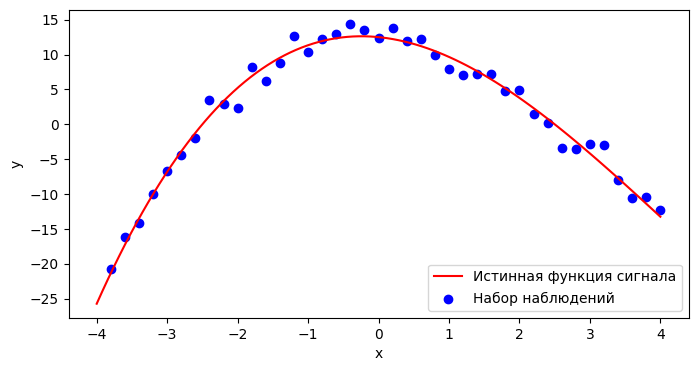

In [15]:
model_1.vizualize_data_1()

##### 4.2 График оценки полезного сигнала, полученного в шаге 1

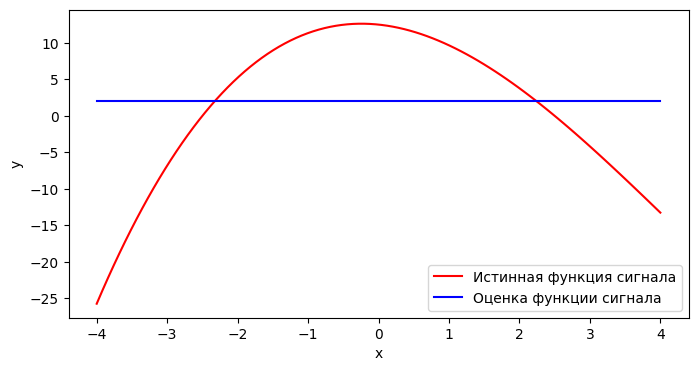

In [16]:
model_1.vizualize_data_2()

##### 4.3 Графики доверительных интервалов полезного сигнала, полученных в шаге 3:

Уровень надежности 0,95:

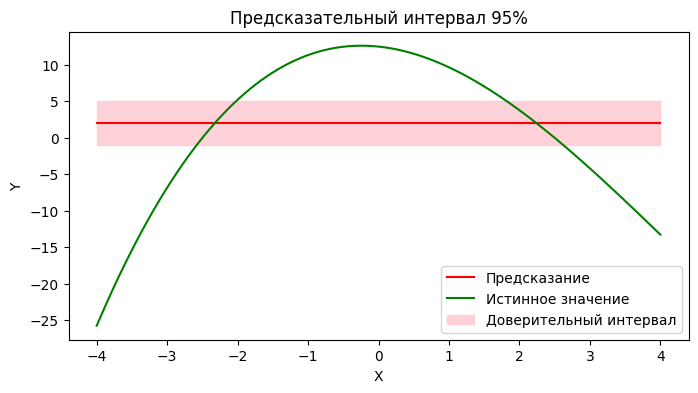

In [17]:
# Построение графика
plt.figure(figsize=(8, 4))
plt.plot(X_pred, model_1.predict(X_pred), color='red', label='Предсказание')
plt.plot(X_pred, model_1.phi(X_pred), color='green', label='Истинное значение')
plt.fill_between(X_pred, lower_bound_95, upper_bound_95, color='pink', alpha=0.7, label='Доверительный интервал')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Предсказательный интервал 95%')
plt.show()

Уровень надежности 0,99:

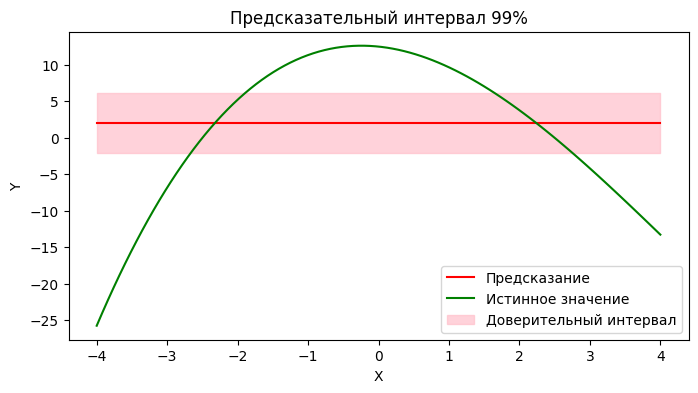

In [18]:
# Построение графика
plt.figure(figsize=(8, 4))
plt.plot(X_pred, model_1.predict(X_pred), color='red', label='Предсказание')
plt.plot(X_pred, model_1.phi(X_pred), color='green', label='Истинное значение')
plt.fill_between(X_pred, lower_bound_99, upper_bound_99, color='pink', alpha=0.7, label='Доверительный интервал')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Предсказательный интервал 99%')
plt.show()

#### Пункт 5. Гистограмма распределения случайной ошибки

Для построения гистограммы расчитаем число столбцов по формуле Стёрджеса:
$$N_{bins} = 1+[3.322lgN] = 6$$ 

Полученная гистограмма:
$$\hat{f}_n(x)=
\begin{cases}
0, x\in(-\infty; -22.825)\\
\frac{2}{40 \cdot 5.87}, x\in[-22.825, -16.954)\\
\frac{5}{40 \cdot 5.87}, x\in[-16.954, -11.083)\\
\frac{5}{40 \cdot 5.87}, x\in[-11.083, -5.211)\\
\frac{6}{40 \cdot 5.87}, x\in[-5.211, 0.660)\\
\frac{10}{40 \cdot 5.87}, x\in[0.660, 6.532)\\
\frac{12}{40 \cdot 5.87}, x\in[6.532, 12.403]\\
0, x\in(12.403; \infty)\\
\end{cases}
$$

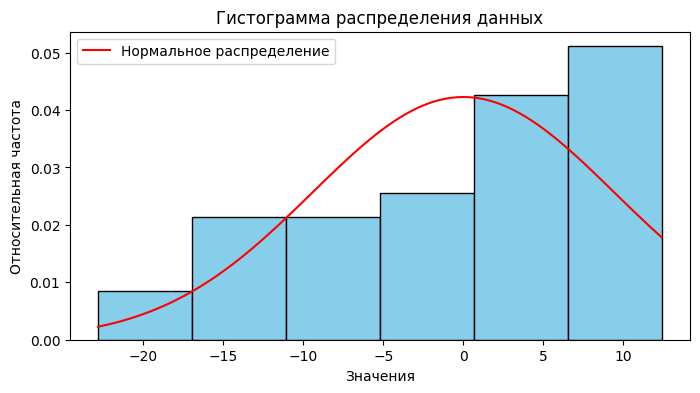

In [19]:
p_value, chi2_statistic = model_1.build_hist()

#### Пункт 6. Оценка дисперсии случайной ошибки

Для линейной модели регрессии в предположении, что ошибки нормальны МП оценка дисперсии случайной ошибки рассчитывается по формуле:

$$\hat{\sigma^2}_{MLE} = \frac{\sum_{i=1}^{n}(e_i^2)}{n}$$

где $e_i=y_i-\hat{y_i}$ - остатки модели

In [20]:
y_obs = model_1.phi(model_1.x_k)+model_1.eps
y_estimate = model_1.predict(model_1.x_k)

# Расчет остатков
residuals = y_obs - y_estimate
print("Вектор остатков:")
print(residuals)

Вектор остатков:
[-22.82544929 -18.18484184 -16.12068112 -11.98753951  -8.75870514
  -6.45797984  -4.03154248   1.45367593   0.87298478   0.28892138
   6.18166303   4.25885883   6.74906221  10.71114517   8.34891094
  10.23150573  10.87559064  12.40329783  11.55698534  10.37752552
  11.82377419   9.86682749  10.17413001   7.84835174   5.90295949
   4.9872267    5.22028068   5.19134137   2.78335017   2.8494489
  -0.49491763  -1.81273108  -5.42781289  -5.55422134  -4.88814245
  -5.04087559  -9.9463825  -12.58098972 -12.50944301 -14.33556278]


In [21]:
estimated_variance = np.sum(residuals**2) / (model_1.n)

print(f"Оценка дисперсии случайной ошибки: {estimated_variance}")

Оценка дисперсии случайной ошибки: 89.04242210895896


#### Пункт 7. Проверка гипотезы о том, что закон распределения ошибки наблюдения является нормальным

Основная гипотеза состоит в том, что мы предполагаем, что ошибки распределения имеют нормальное распределение, т.е.
$$H_0: E \sim N(0, \hat{\sigma^2}_{MLE})$$

Альтернативная гипотеза утверждает обратное, т.е.
$$H_A: E \not\sim N(0, \hat{\sigma^2}_{MLE})$$

Нужная нам статистика рассчитывается по формуле:
$$\chi^2 = n\sum_{k=0}^{l}\frac{(\hat{p}_k-p_k)^2}{p_k}$$
где $p_k = F(t_{k+1}) - F(t_{k})$

$-\infty=t_o<t_1<\dots<t_l<t_{l+1} = \infty$

$F(x)$ в свою очередь является функцией распределения нормального распределения с МП оценками параметров (т.е. выборочное среднее и выборочная дисперсия)

Алгоритм проверки гипотезы
1. Расчитать статистику
2. Расчитать `p-value` для полученной статистики для $\chi^2$ распределения с $df = \hat{n}-1 = 6$ степеней свободы (так как кол-во ненулевых промежутков = 8, $\hat{n}=8-1=7$, и -1, т.к. два параметра у нормального распредления)
3. Если `p-value` меньше $\alpha$ (в нашем случае $\alpha=0.05$), то отклоняем нулевую гипотезу. Иначе признаем нулевую гипотезу верной.

In [22]:
# Уровень значимости
alpha = 0.05

# Вывод результатов
print(f"Статистика хи-квадрат: {chi2_statistic}")
print(f"P-значение: {p_value}")

# Проверяем гипотезу
if p_value < alpha:
    print("Отклоняем гипотезу о нормальности распределения остатков.")
else:
    print("Не отклоняем гипотезу о нормальности распределения остатков.")

Статистика хи-квадрат: 13.398849090520075
P-значение: 0.037121741074052306
Отклоняем гипотезу о нормальности распределения остатков.


### Случай 2
$m=2, \varepsilon_k \sim N(-3\sigma, 3\sigma)$


Инициализируем модель с заданными параметрами для первого случая

In [23]:
model_2 = Model(m=2, theta=[12.5, -1.0, -2.0, 0.16], sigma=1.6, normal_eps=False)

In [24]:
print("Вектор ошибок:\n")
print(model_2.eps)

Вектор ошибок:

[ 0.35186123  2.50308426  3.30793536  0.92420499  3.34212749  2.51403782
 -1.56516637 -0.1159193   3.61458643  0.48827141  0.69511566 -0.72858629
  3.11903726 -1.05148148  0.21004824 -1.71037372 -3.77297942  0.62989951
 -3.07461475  2.86154738 -1.59508467 -2.18020186 -0.29266487 -1.4560514
 -3.70726325 -2.67668282  0.41980027  2.94194947  0.53142816 -3.40646812
  0.85147408 -1.43709791 -0.93867701  1.94193616 -1.63086416 -1.89904388
 -2.00411181  0.0882728  -0.59633548  1.61174472]


In [25]:
print("список X, на которых строятся наблюдения:\n")
print(model_2.x_k)

список X, на которых строятся наблюдения:

[-3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4 -2.2 -2.  -1.8 -1.6 -1.4 -1.2
 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6
  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  4. ]


In [26]:
print("Полученные наблюдения:\n")
print(model_2.y_obs)

Полученные наблюдения:

[-1.22281388e+01 -7.31691574e+00 -3.91206464e+00 -3.85579501e+00
  8.42127490e-01  2.13403782e+00  1.48336300e-02  3.26408070e+00
  8.63458643e+00  6.98827141e+00  8.51511566e+00  8.25141371e+00
  1.30990373e+01  9.76851852e+00  1.17100482e+01  1.03096263e+01
  8.60702058e+00  1.32098995e+01  9.54538525e+00  1.53615474e+01
  1.06249153e+01  9.59979814e+00  1.08873351e+01  8.96394860e+00
  5.79273675e+00  5.74331718e+00  7.59980027e+00  8.72194947e+00
  4.75142816e+00 -9.06468120e-01  1.47147408e+00 -2.85709791e+00
 -4.55867701e+00 -4.03806384e+00 -1.01308642e+01 -1.30790439e+01
 -1.60241118e+01 -1.69317272e+01 -2.07763355e+01 -2.18882553e+01]


#### Пункт 1. Вычисление порядка многочлена для модели, нахождение оценки параметров

Проверка значимости коэффициентов регрессии означает проверку основной гипотезы об их значимом отличии от нуля.

Основная гипотеза состоит в предположении о незначимости коэффициента модели регрессии, т. е.
$$H_0 : \hat{\theta}_{\hat{m}} = 0$$

Обратная или конкурирующая гипотеза состоит в предположении о значимости коэффициентов модели регрессии, т. е.
$$H_1 : \hat{\theta}_{\hat{m}} \neq 0$$

Для проверки гипотезы  на уровне значимости $\alpha$  используем статистический критерий $T_i=\frac{\hat{\theta}_i}{\mu_i}$, где $\hat{\theta}_i$ – оценка параметра модели, а $\mu_i$ – ее стандартная ошибка

$$\mu_i = \sqrt{\hat{\sigma}^2*(X^TX)^{-1}_{ii}}$$ 
$\hat{\sigma}^2$ - оценка дисперсии ошибок
$$\hat{\sigma}^2 = \frac{(y_i - \hat{y_i})^2}{n-\hat{m}-1}$$
где n - кол-во наблюдений, $\hat{m}$ - степень многочлена


Для нахождения степени многочлена будем итеративно перебирать степень $\hat{m}$ пока не найдем такую, что при $\hat{m}+1$ выполняется $H_0$.

Функция для итеративного T-теста описана в приложении №2

In [27]:
from model import iterative_t_test 

In [28]:
m_hat = 1
print('==============================================================================')
print('m_estimate = ', m_hat)
while iterative_t_test(model_2.x_k, model_2.phi(model_2.x_k)+model_2.eps, m_hat):
    m_hat+=1
    print('==============================================================================')
    print('m_estimate = ', m_hat)

m_hat -= 1


m_estimate =  1
theta_1 является статистически значимым.
m_estimate =  2
theta_2 является статистически значимым.
m_estimate =  3
theta_3 не является статистически значимым.


Так как при $\hat{m}=3$: $\hat{\theta}_3$ не является статистически значимым $\Rightarrow$ полагаем, что $\hat{m}=2$

Расчитаем коэфициент: 

In [29]:
model_2.fit(m_hat)
for i in range(len(model_2.params)):
    print(f"theta_{i} = {model_2.params[i]}")

theta_0 = 11.708747580268767
theta_1 = -1.3433713936254033
theta_2 = -1.858931289823263


Воспользуемся специализированной статистической библиотекой на ```python``` и проверим результы полученные в библиотеке с теми, которые получили на прошлом этапе 

In [30]:
X = np.vander(model_2.x_k, m_hat+1, increasing=True)
model = sm.OLS(model_2.y_obs, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     531.8
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           5.52e-28
Time:                        15:27:39   Log-Likelihood:                -80.470
No. Observations:                  40   AIC:                             166.9
Df Residuals:                      37   BIC:                             172.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7087      0.446     26.249      0.0

#### Пункт 2. Доверительные интервалы для параметров

Для рассчета доверительных интервалов для параметров воспользуемся формулой:

$$\theta_i \in (\hat{\theta_i} - T_{crit} * \mu_i; \hat{\theta_i} + T_{crit} * \mu_i)$$
где $\mu_i$ - это стандартная ошибка параметра
$$\mu_i = \sqrt{\hat{\sigma}^2*(X^TX)^{-1}_{ii}}$$ 
$\hat{\sigma}^2$ - оценка дисперсии ошибок
$$\hat{\sigma}^2 = \frac{(y_i - \hat{y_i})^2}{n-\hat{m}-1}$$
где n - кол-во наблюдений

$T_{crit}$ - критическое значение Т-статистики для уровня значимости $\alpha$ и стененей свободы $df=n-\hat{m}-1$ 

Функция для расчета интервалов указана в приложении №3

Интервалы уровней надежности $\alpha_1=0.95$:

In [31]:
confidence_intervals = model_2.parameters_confidence_intervals(alpha=0.05)

for i in range(len(model_2.params)):
    print(f"theta_{i}: {model_2.params[i]}")
    print(f"Доверительный интервал для коэффициента {i}: {confidence_intervals[i]}")
    print()

theta_0: 11.708747580268767
Доверительный интервал для коэффициента 0: (10.804934701472053, 12.612560459065481)

theta_1: -1.3433713936254033
Доверительный интервал для коэффициента 1: (-1.6056121933414391, -1.0811305939093674)

theta_2: -1.858931289823263
Доверительный интервал для коэффициента 2: (-1.9854538945815796, -1.7324086850649465)



интервалы уровней надежности $\alpha_1=0.99$

In [32]:
confidence_intervals = model_2.parameters_confidence_intervals(alpha=0.01)

for i in range(len(model_2.params)):
    print(f"theta_{i}: {model_2.params[i]}")
    print(f"Доверительный интервал для коэффициента {i}: {confidence_intervals[i]}")
    print()

theta_0: 11.708747580268767
Доверительный интервал для коэффициента 0: (10.497499676372819, 12.919995484164716)

theta_1: -1.3433713936254033
Доверительный интервал для коэффициента 1: (-1.6948142933934747, -0.9919284938573318)

theta_2: -1.858931289823263
Доверительный интервал для коэффициента 2: (-2.0284909889647436, -1.6893715906817826)



#### Пункт 3. Доверительные интервалы для полезного сигнала

Пусть мы имеем вектор $x_{pred}$, для которого мы хотим сделать предсказание. Так же есть функция оценки полезного сигнала $\hat{f}$, тогда доверительный интервал для $f(x_{pred})$ при уровне надежности $\alpha$ находится по формуле:

$$
\hat{f}(x_{pred})-T_{crit}\sqrt{MSE*(x_{pred}(X^TX)^{-1}x_{pred}^T)}
\le f(x_{pred}) \le
\hat{f}(x_{pred})+T_{crit}\sqrt{MSE*(x_{pred}(X^TX)^{-1}x_{pred}^T)}
$$

$MSE$ - среднеквадратичная ошибка

$T_{crit}$ - критическое значение Т-статистики для уровня значимости $\alpha$ и стененей свободы $df=n-\hat{m}-1$ 

Функция для расчета указана в приложении №4

In [33]:
X_pred = np.linspace(-4, 4, 100)

In [34]:
lower_bound_95, upper_bound_95 = model_2.prediction_interval(X_pred, alpha=0.05)

95.0% interval: (-1.85893128982326*x**2 - 1.3433713936254*x - 3.8112069705003*sqrt(x**2*(0.00110207507511744*x**2 - 0.000220415015023488*x - 0.00586303939962477) - 0.00586303939962477*x**2 + x*(-0.000220415015023488*x**2 + 0.00473451452270451*x + 0.000703564727954975) + 0.000703564727954975*x + 0.0562382739212008) + 11.7087475802688,-1.85893128982326*x**2 - 1.3433713936254*x + 3.8112069705003*sqrt(x**2*(0.00110207507511744*x**2 - 0.000220415015023488*x - 0.00586303939962477) - 0.00586303939962477*x**2 + x*(-0.000220415015023488*x**2 + 0.00473451452270451*x + 0.000703564727954975) + 0.000703564727954975*x + 0.0562382739212008) + 11.7087475802688)


In [35]:
lower_bound_99, upper_bound_99 = model_2.prediction_interval(X_pred, alpha=0.01)

99.0% interval: (-1.85893128982326*x**2 - 1.3433713936254*x - 5.10760198557695*sqrt(x**2*(0.00110207507511744*x**2 - 0.000220415015023488*x - 0.00586303939962477) - 0.00586303939962477*x**2 + x*(-0.000220415015023488*x**2 + 0.00473451452270451*x + 0.000703564727954975) + 0.000703564727954975*x + 0.0562382739212008) + 11.7087475802688,-1.85893128982326*x**2 - 1.3433713936254*x + 5.10760198557695*sqrt(x**2*(0.00110207507511744*x**2 - 0.000220415015023488*x - 0.00586303939962477) - 0.00586303939962477*x**2 + x*(-0.000220415015023488*x**2 + 0.00473451452270451*x + 0.000703564727954975) + 0.000703564727954975*x + 0.0562382739212008) + 11.7087475802688)


#### Пункт 4. Графическое представление


##### 4.1 График истинного полезного сигнала и набора наблюдений

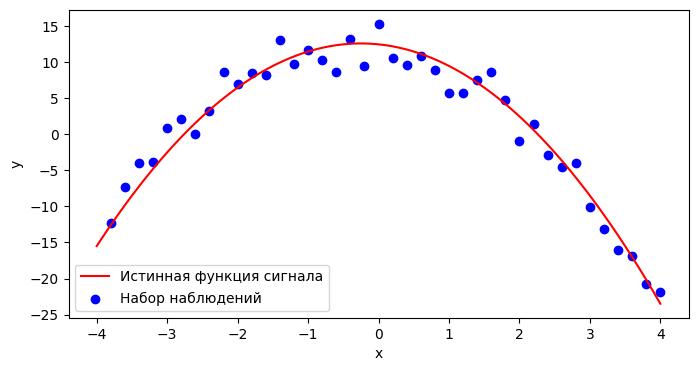

In [36]:
model_2.vizualize_data_1()

##### 4.2 График оценки полезного сигнала, полученного в шаге 1

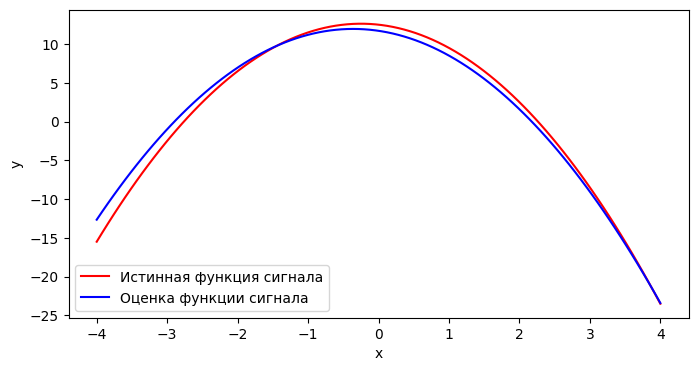

In [37]:
model_2.vizualize_data_2()

##### 4.3 Графики доверительных интервалов полезного сигнала, полученных в шаге 3:

Уровень надежности 0,95:

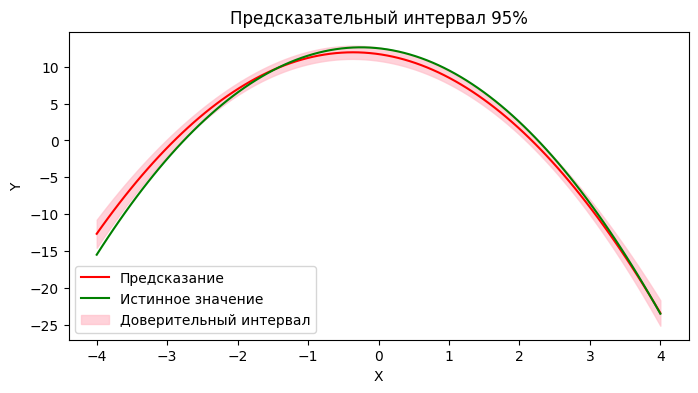

In [38]:
# Построение графика
plt.figure(figsize=(8, 4))
plt.plot(X_pred, model_2.predict(X_pred), color='red', label='Предсказание')
plt.plot(X_pred, model_2.phi(X_pred), color='green', label='Истинное значение')
plt.fill_between(X_pred, lower_bound_95, upper_bound_95, color='pink', alpha=0.7, label='Доверительный интервал')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Предсказательный интервал 95%')
plt.show()

Уровень надежности 0,99:

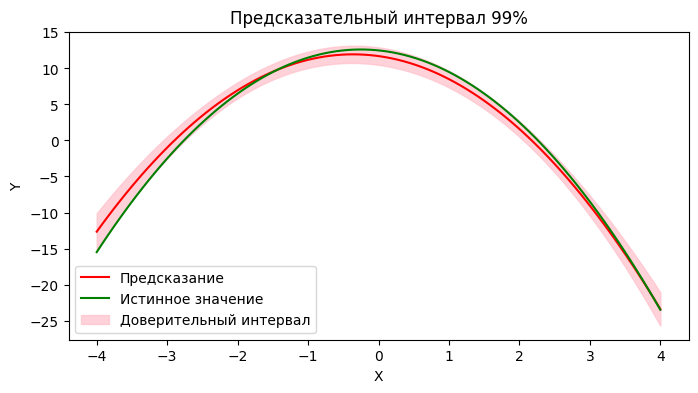

In [39]:
# Построение графика
plt.figure(figsize=(8, 4))
plt.plot(X_pred, model_2.predict(X_pred), color='red', label='Предсказание')
plt.plot(X_pred, model_2.phi(X_pred), color='green', label='Истинное значение')
plt.fill_between(X_pred, lower_bound_99, upper_bound_99, color='pink', alpha=0.7, label='Доверительный интервал')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Предсказательный интервал 99%')
plt.show()

#### Пункт 5. Гистограмма распределения случайной ошибки

Для построения гистограммы расчитаем число столбцов по формуле Стёрджеса:
$$N_{bins} = 1+[3.322lgN] = 6$$ 

Полученная гистограмма:
$$\hat{f}_n(x)=
\begin{cases}
0, x\in(-\infty; -3.239)\\
\frac{6}{40 \cdot 3.921}, x\in[-3.239, -2.045)\\
\frac{8}{40 \cdot 3.921}, x\in[-2.045, -0.852)\\
\frac{10}{40 \cdot 3.921}, x\in[-0.852, 0.341)\\
\frac{9}{40 \cdot 3.921}, x\in[0.341, 1.535)\\
\frac{3}{40 \cdot 3.921}, x\in[1.535, 2.728)\\
\frac{4}{40 \cdot 3.921}, x\in[2.728, 3.921]\\
0, x\in(3.921; \infty)\\
\end{cases}
$$

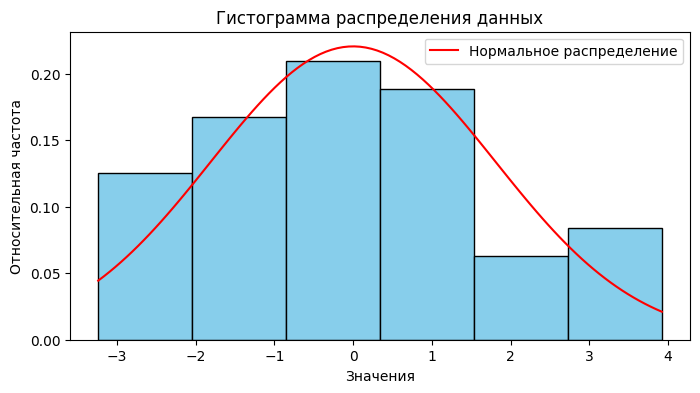

In [40]:
p_value, chi2_statistic = model_2.build_hist()

#### Пункт 6. Оценка дисперсии случайной ошибки

Для линейной модели регрессии в предположении, что ошибки нормальны МП оценка дисперсии случайной ошибки рассчитывается по формуле:

$$\hat{\sigma^2}_{MLE} = \frac{\sum_{i=1}^{n}(e_i^2)}{n}$$

где $e_i=y_i-\hat{y_i}$ - остатки модели

In [41]:
y_obs = model_2.phi(model_1.x_k)+model_2.eps
y_estimate = model_2.predict(model_2.x_k)

# Расчет остатков
residuals = y_obs - y_estimate
print("Вектор остатков:")
print(residuals)

Вектор остатков:
[-2.19872982  0.22994918  1.30097075 -0.82787464  1.83364734  1.23787165
 -2.62030405 -0.961314    2.96764923  0.0285062   0.41123695 -0.847864
  3.15307506 -0.87541368  0.51686056 -1.28410239 -3.23853457  1.26123238
 -2.35767936  3.6527998  -0.74080072 -1.27417188  0.65382565 -0.48038584
 -2.71370815 -1.67652367  1.41527797  3.92146022  1.48368647 -2.49274775
  1.71537101 -0.63430992 -0.20828345  2.58864979 -1.07911595 -1.45354659
 -1.67615094  0.28741175 -0.53730394  1.51938335]


In [42]:
estimated_variance = np.sum(residuals**2) / (model_2.n)

print(f"Оценка дисперсии случайной ошибки: {estimated_variance}")

Оценка дисперсии случайной ошибки: 3.2726940723286426


#### Пункт 7. Проверка гипотезы о том, что закон распределения ошибки наблюдения является нормальным

Для проверки гипотезы о том, что закон распределения ошибки наблюдения является нормальным воспользуемся $\chi^2$-критерием Пирсона

Основная гипотеза состоит в том, что мы предполагаем, что ошибки распределения имеют нормальное распределение, т.е.
$$H_0: E \sim N(0, \hat{\sigma^2}_{MLE})$$

Альтернативная гипотеза утверждает обратное, т.е.
$$H_A: E \not\sim N(0, \hat{\sigma^2}_{MLE})$$

Нужная нам статистика рассчитывается по формуле:
$$\chi^2 = n\sum_{k=0}^{l}\frac{(\hat{p}_k-p_k)^2}{p_k}$$
где $p_k = F(t_{k+1}) - F(t_{k})$

$-\infty=t_o<t_1<\dots<t_l<t_{l+1} = \infty$

$F(x)$ в свою очередь является функцией распределения нормального распределения с МП оценками параметров (т.е. выборочное среднее и выборочная дисперсия)

Алгоритм проверки гипотезы
1. Расчитать статистику
2. Расчитать `p-value` для полученной статистики для $\chi^2$ распределения с $df = \hat{n}-1 = 6$ степеней свободы (так как кол-во ненулевых промежутков = 8, $\hat{n}=8-1=7$, и -1, т.к. один параметр у нормального распредления)
3. Если `p-value` меньше $\alpha$ (в нашем случае $\alpha=0.05$), то отклоняем нулевую гипотезу. Иначе признаем нулевую гипотезу верной.

In [43]:
# Уровень значимости
alpha = 0.05

# Вывод результатов
print(f"Статистика хи-квадрат: {chi2_statistic}")
print(f"P-значение: {p_value}")

# Проверяем гипотезу
if p_value < alpha:
    print("Отклоняем гипотезу о нормальности распределения остатков.")
else:
    print("Не отклоняем гипотезу о нормальности распределения остатков.")

Статистика хи-квадрат: 6.449577106502813
P-значение: 0.3747543818200002
Не отклоняем гипотезу о нормальности распределения остатков.
